# Alignment

In [ ]:
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio import SeqIO, AlignIO
import pandas as pd

## Prepare fasta file for clustalo

In [ ]:
kd=pd.read_excel('out/uniprot_kd.xlsx')

In [ ]:
kd

,kd_ID,Uniprot,Entry Name,Protein names,Gene Names,Gene Names (primary),Organism,kd_note,kd_evidence,kd_start,...,Reactome,ComplexPortal,Subcellular location [CC],Gene Ontology (biological process),Tissue specificity,Interacts with,Subunit structure,Function [CC],Activity regulation,full_seq
0,A0A075F7E9_LERK1_ORYSI_KD1,A0A075F7E9,LERK1_ORYSI,G-type lectin S-receptor-like serine/threonine...,LECRK1 LECRK OsI_14840,LECRK1,Oryza sativa subsp. indica (Rice),Protein kinase,ECO:0000255|PROSITE-ProRule:PRU00159,523,...,NaN,NaN,SUBCELLULAR LOCATION: Membrane {ECO:0000255}; ...,defense response [GO:0006952]; response to oth...,"TISSUE SPECIFICITY: Expressed in plumules, rad...",NaN,SUBUNIT: Interacts (via kinase domain) with AD...,FUNCTION: Involved in innate immunity. Require...,NaN,MVALLLFPMLLQLLSPTCAQTQKNITLGSTLAPQGPASSWLSPSGD...
1,A0A078BQP2_GCY25_CAEEL_KD1,A0A078BQP2,GCY25_CAEEL,Receptor-type guanylate cyclase gcy-25 (EC 4.6...,gcy-25 Y105C5B.2,gcy-25,Caenorhabditis elegans,Protein kinase,ECO:0000255|PROSITE-ProRule:PRU00159,464,...,R-CEL-2514859;,NaN,SUBCELLULAR LOCATION: Cell membrane {ECO:00003...,cGMP biosynthetic process [GO:0006182]; intrac...,"TISSUE SPECIFICITY: Expressed in AQR, PQR and ...",NaN,NaN,FUNCTION: Guanylate cyclase involved in the pr...,NaN,MLLLLLLLKISTFVDSFQIGHLEFENSNETRILEICMKNAGSWRDH...
2,A0A078CGE6_M3KE1_BRANA_KD1,A0A078CGE6,M3KE1_BRANA,MAP3K epsilon protein kinase 1 (BnM3KE1) (EC 2...,M3KE1 BnaA03g30290D GSBRNA2T00111755001,M3KE1,Brassica napus (Rape),Protein kinase,ECO:0000255|PROSITE-ProRule:PRU00159,20,...,NaN,NaN,"SUBCELLULAR LOCATION: Cytoplasm, cytoskeleton,...",cell division [GO:0051301]; protein autophosph...,TISSUE SPECIFICITY: Expressed in both the spor...,NaN,NaN,FUNCTION: Serine/threonine-protein kinase invo...,NaN,MARQMTSSQFHKSKTLDNKYMLGDEIGKGAYGRVYIGLDLENGDFV...
3,A0A0G2K344_PK3CA_RAT_KD1,A0A0G2K344,PK3CA_RAT,"Phosphatidylinositol 4,5-bisphosphate 3-kinase...",Pik3ca,Pik3ca,Rattus norvegicus (Rat),PI3K/PI4K catalytic,ECO:0000255|PROSITE-ProRule:PRU00269,765,...,R-RNO-109704;R-RNO-112399;R-RNO-114604;R-RNO-1...,NaN,NaN,actin cytoskeleton organization [GO:0030036]; ...,TISSUE SPECIFICITY: Detected in the hypothalam...,NaN,SUBUNIT: Heterodimer of a catalytic subunit PI...,FUNCTION: Phosphoinositide-3-kinase (PI3K) pho...,NaN,MPPRPSSGELWGIHLMPPRILVECLLPNGMIVTLECLREATLVTIK...
4,A0A0H2ZM62_HK06_STRP2_KD1,A0A0H2ZM62,HK06_STRP2,Sensor histidine protein kinase HK06 (EC 2.7.1...,hk06 SPD_2019,hk06,Streptococcus pneumoniae serotype 2 (strain D3...,Histidine kinase,ECO:0000255|PROSITE-ProRule:PRU00107,239,...,NaN,NaN,SUBCELLULAR LOCATION: Cell membrane {ECO:00003...,NaN,NaN,NaN,NaN,FUNCTION: Member of the two-component regulato...,NaN,MIKNPKLLTKSFLRSFAILGGVGLVIHIAIYLTFPFYYIQLEGEKF...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5531,W0LYS5_CAMKI_MACNP_KD1,W0LYS5,CAMKI_MACNP,Calcium/calmodulin-dependent protein kinase ty...,CaMKI,CaMKI,Macrobrachium nipponense (Oriental river shrim...,Protein kinase,ECO:0000255|PROSITE-ProRule:PRU00159,31,...,NaN,NaN,NaN,molting cycle process [GO:0022404],TISSUE SPECIFICITY: Highly expressed in hepato...,NaN,NaN,FUNCTION: Calcium/calmodulin-dependent protein...,ACTIVITY REGULATION: Activated by Ca(2+)/calmo...,MPLFGSKKETAKKSSKKDKDEGKMPAVEDKYILKDLLGTGAFSQVR...
5532,W0T9X4_ATG1_KLUMD_KD1,W0T9X4,ATG1_KLUMD,Serine/threonine-protein kinase ATG1 (EC 2.7.1...,ATG1 KLMA_30321,ATG1,Kluyveromyces marxianus (strain DMKU3-1042 / B...,Protein kinase,ECO:0000255|PROSITE-ProRule:PRU00159,21,...,NaN,NaN,SUBCELLULAR LOCATION: Cytoplasm {ECO:0000250|U...,autophagosome assembly [GO:0000045]; autophagy...,NaN,W0TA43,SUBUNIT: Homodimer (By similarity). Dimerizati...,FUNCTION: Serine/threonine protein kinase invo...,NaN,MSSESHGKAVAKAIRLPTENYTVEKEIGKGSFAIVYKGVSLRDGRN...
5533,W7JX98_KGP_PLAFO_KD1,W7JX98,KGP_PLAFO,cGMP-dependent protein kinase (EC 2.7.11.12),PKG PFNF54_05395,PKG,Plasmodium falciparum (isolate NF54),Protein kinase,ECO:0000255|PROSITE-Pr

In [ ]:
def get_fasta(df,seq_col='kd_seq',id_col='kd_ID',path='out.fasta'):
    "Generate fasta file from sequences."
    records = [
        SeqRecord(Seq(row[seq_col]), id=row[id_col], description="")
        for _, row in df.iterrows()
    ]
    SeqIO.write(records, path, "fasta")
    print(len(records))

In [ ]:
get_fasta(kd,path='raw/kinase_domains.fasta')

5536


For human only:

In [ ]:
human = kd[kd.Organism=='Homo sapiens (Human)']

In [ ]:
get_fasta(human,path="raw/human_kinase_domains.fasta")

539


for PI3K catalytic domain

In [ ]:
pi3k = kd[kd.kd_note=='PI3K/PI4K catalytic']

In [ ]:
get_fasta(pi3k,path="raw/pi3k_kinase_domains.fasta")

168


## Run clustalo

```bash
sudo apt-get update
sudo apt-get install clustalo
clustalo -i kinase_domains.fasta -o kinase_domains.aln --force --outfmt=clu
```

In [ ]:
# import subprocess
# subprocess.run([
#     "clustalo", "-i", "kinase_domains.fasta", 
#     "-o", "kinase_domains.aln", "--force", "--outfmt=clu"
# ])

## Analyze alignment

In [ ]:
alignment = AlignIO.read("raw/kinase_domains.aln", "clustal")

Turns in to dataframe:

In [ ]:
alignment_array = [list(str(record.seq)) for record in alignment]
df = pd.DataFrame(alignment_array)

In [ ]:
df.columns = df.columns+1

In [ ]:
df.index=kd.kd_ID

In [ ]:
# df.to_parquet('output/uniprot_kd_align.parquet')

In [ ]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,3425,3426,3427,3428,3429,3430,3431,3432,3433,3434
kd_ID,,,,,,,,,,,,,,,,,,,,,
A0A075F7E9_LERK1_ORYSI_KD1,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
A0A078BQP2_GCY25_CAEEL_KD1,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
A0A078CGE6_M3KE1_BRANA_KD1,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
A0A0G2K344_PK3CA_RAT_KD1,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
A0A0H2ZM62_HK06_STRP2_KD1,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [ ]:
# Compute residue frequency at each position
counts_df = df.apply(lambda col: col.value_counts(), axis=0).fillna(0)
freq_df = counts_df.div(counts_df.sum(axis=0), axis=1)

In [ ]:
freq_df.head()

,1,2,3,4,5,6,7,8,9,10,...,3425,3426,3427,3428,3429,3430,3431,3432,3433,3434
-,0.999819,0.999819,0.999819,0.999819,0.999819,0.999819,0.999819,0.999819,0.999819,0.999819,...,0.999819,0.999819,0.999819,0.999819,0.999819,0.999819,0.999819,0.999819,0.999819,0.999819
A,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
C,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
D,0.000000,0.000181,0.000000,0.000000,0.000181,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000181,0.000181,0.000000,0.000000,0.000000,0.000181,0.000000,0.000000,0.000000
E,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000181,0.000000,0.000000


In [ ]:
# remove '-' first line
max_series=freq_df.iloc[1:,:]

In [ ]:
freq_max = pd.concat([max_series.idxmax(),max_series.max()],axis=1)

In [ ]:
freq_max.columns = ['aa','max_value']

In [ ]:
freq_max = freq_max.sort_values('max_value',ascending=False).reset_index(names='position')

In [ ]:
out = freq_max[freq_max.max_value>0.1]

In [ ]:
# out.to_csv('out/align_freq_max_aa.csv',index=False)

In [ ]:
out

,position,aa,max_value
0,1549,N,0.815390
1,2618,D,0.809429
2,1724,D,0.800759
3,1525,D,0.791004
4,1730,G,0.775470
...,...,...,...
214,193,E,0.101879
215,640,G,0.101879
216,922,L,0.101337
217,603,R,0.101156


## Locate active motif & save

- 1549 N is after HRD motif
- 2618 D is around D[IV]WS motif
- 1724 D is DFG motif
- 1525 D is HRD motif

In [ ]:
kd['D1']=(df[1525]=='D').astype(int) # HRD

In [ ]:
kd['D2'] = (df[1724]=='D').astype(int) #DFG

In [ ]:
kd['D3']=(df[2618]=='D').astype(int)

In [ ]:
kd['N1'] = (df[1549]=='N').astype(int)

In [ ]:
active_col = ['D1','D2']

In [ ]:
kd['active_D1_D2'] = (kd[active_col].sum(1)==len(active_col)).astype(int)

In [ ]:
active_all = kd[kd.active_D1_D2==1]

In [ ]:
active_all.shape

(4209, 32)

In [ ]:
# active_all.to_excel('out/uniprot_kd_active_D1_D2.xlsx',index=False)

In [ ]:
# kd.to_excel('out/uniprot_kd_motif_labeled.xlsx',index=False)

Take a look of their identity:

In [ ]:
kd[kd.active_D1_D2==1].kd_note.value_counts()

kd_note
Protein kinase               4005
PI3K/PI4K catalytic            71
Protein kinase 2               61
Protein kinase 1               37
Histidine kinase               34
Alpha-type protein kinase       1
Name: count, dtype: int64

In [ ]:
kd[kd.active_D1_D2==0].kd_note.value_counts()

kd_note
Histidine kinase                  591
Protein kinase                    525
PI3K/PI4K catalytic                97
Protein kinase 1                   36
Alpha-type protein kinase          21
Protein kinase; inactive           13
Protein kinase 2                   12
HWE histidine kinase domain        11
Guanylate kinase-like               5
Histidine kinase 2                  4
Histidine kinase 1                  4
Amino-acid kinase domain (AAK)      3
Kinase domain                       2
Histidine kinase; first part        1
Histidine kinase; second part       1
Protein kinase; truncated           1
Name: count, dtype: int64

## Merge with human PSPA

In [ ]:
human = kd[kd.Organism=='Homo sapiens (Human)']

In [ ]:
human.active_D1_D2.value_counts()

active_D1_D2
1    444
0     95
Name: count, dtype: int64

In [ ]:
human_active = human[human.active_D1_D2==1]

In [ ]:
human_active[human_active.Uniprot.duplicated(keep=False)]

,kd_ID,Uniprot,Entry Name,Protein names,Gene Names,Gene Names (primary),Organism,kd_note,kd_evidence,kd_start,...,Interacts with,Subunit structure,Function [CC],Activity regulation,full_seq,D1,D2,D3,N1,active_D1_D2
988,O75582_KS6A5_HUMAN_KD1,O75582,KS6A5_HUMAN,Ribosomal protein S6 kinase alpha-5 (S6K-alpha...,RPS6KA5 MSK1,RPS6KA5,Homo sapiens (Human),Protein kinase 1,ECO:0000255|PROSITE-ProRule:PRU00159,49,...,P67870; Q9UI47-2; Q9Y4C1; Q9NYL2; Q16539; Q9Y4C1,SUBUNIT: Forms a complex with either MAPK1/ERK...,FUNCTION: Serine/threonine-protein kinase that...,ACTIVITY REGULATION: Activated by phosphorylat...,MEEEGGSSGGAAGTSADGGDGGEQLLTVKHELRTANLTGHAEKVGI...,1,1,1,1,1
989,O75582_KS6A5_HUMAN_KD2,O75582,KS6A5_HUMAN,Ribosomal protein S6 kinase alpha-5 (S6K-alpha...,RPS6KA5 MSK1,RPS6KA5,Homo sapiens (Human),Protein kinase 2,ECO:0000255|PROSITE-ProRule:PRU00159,426,...,P67870; Q9UI47-2; Q9Y4C1; Q9NYL2; Q16539; Q9Y4C1,SUBUNIT: Forms a complex with either MAPK1/ERK...,FUNCTION: Serine/threonine-protein kinase that...,ACTIVITY REGULATION: Activated by phosphorylat...,MEEEGGSSGGAAGTSADGGDGGEQLLTVKHELRTANLTGHAEKVGI...,1,1,1,1,1
990,O75676_KS6A4_HUMAN_KD1,O75676,KS6A4_HUMAN,Ribosomal protein S6 kinase alpha-4 (S6K-alpha...,RPS6KA4 MSK2,RPS6KA4,Homo sapiens (Human),Protein kinase 1,ECO:0000255|PROSITE-ProRule:PRU00159,33,...,Q16539; O14901,SUBUNIT: Forms a complex with either MAPK1/ERK...,FUNCTION: Serine/threonine-protein kinase that...,ACTIVITY REGULATION: Activated by phosphorylat...,MGDEDDDESCAVELRITEANLTGHEEKVSVENFELLKVLGTGAYGK...,1,1,1,1,1
991,O75676_KS6A4_HUMAN_KD2,O75676,KS6A4_HUMAN,Ribosomal protein S6 kinase alpha-4 (S6K-alpha...,RPS6KA4 MSK2,RPS6KA4,Homo sapiens (Human),Protein kinase 2,ECO:0000255|PROSITE-ProRule:PRU00159,411,...,Q16539; O14901,SUBUNIT: Forms a complex with either MAPK1/ERK...,FUNCTION: Serine/threonine-protein kinase that...,ACTIVITY REGULATION: Activated by phosphorylat...,MGDEDDDESCAVELRITEANLTGHEEKVSVENFELLKVLGTGAYGK...,1,1,1,1,1
1918,P51812_KS6A3_HUMAN_KD1,P51812,KS6A3_HUMAN,Ribosomal protein S6 kinase alpha-3 (S6K-alpha...,RPS6KA3 ISPK1 MAPKAPK1B RSK2,RPS6KA3,Homo sapiens (Human),Protein kinase 1,ECO:0000255|PROSITE-ProRule:PRU00159,68,...,P46379-2; P67870; P09471; P08238; O14901; P284...,SUBUNIT: Forms a complex with either MAPK1/ERK...,FUNCTION: Serine/threonine-protein kinase that...,ACTIVITY REGULATION: Upon extracellular signal...,MPLAQLADPWQKMAVESPSDSAENGQQIMDEPMGEEEINPQTEEVS...,1,1,1,1,1
1919,P51812_KS6A3_HUMAN_KD2,P51812,KS6A3_HUMAN,Ribosomal protein S6 kinase alpha-3 (S6K-alpha...,RPS6KA3 ISPK1 MAPKAPK1B RSK2,RPS6KA3,Homo sapiens (Human),Protein kinase 2,ECO:0000255|PROSITE-ProRule:PRU00159,422,...,P46379-2; P67870; P09471; P08238; O14901; P284...,SUBUNIT: Forms a complex with either MAPK1/ERK...,FUNCTION: Serine/threonine-protein kinase that...,ACTIVITY REGULATION: Upon extracellular signal...,MPLAQLADPWQKMAVESPSDSAENGQQIMDEPMGEEEINPQTEEVS...,1,1,1,1,1
2560,Q15349_KS6A2_HUMAN_KD1,Q15349,KS6A2_HUMAN,Ribosomal protein S6 kinase alpha-2 (S6K-alpha...,RPS6KA2 MAPKAPK1C RSK3,RPS6KA2,Homo sapiens (Human),Protein kinase 1,ECO:0000255|PROSITE-ProRule:PRU00159,59,...,P05067; P15056; P67870; O14901; P28482; Q02156...,SUBUNIT: Forms a complex with either MAPK1/ERK...,FUNCTION: Serine/threonine-protein kinase that...,ACTIVITY REGULATION: Upon extracellular signal...,MDLSMKKFAVRRFFSVYLRRKSRSKSSSLSRLEEEGVVKEIDISHH...,1,1,1,1,1
2561,Q15349_KS6A2_HUMAN_KD2,Q15349,KS6A2_HUMAN,Ribosomal protein S6 kinase alpha-2 (S6K-alpha...,RPS6KA2 MAPKAPK1C RSK3,RPS6KA2,Homo sapiens (Human),Protein kinase 2,ECO:0000255|PROSITE-ProRule:PRU00159,415,...,P05067; P15056; P67870; O14901; P28482; Q02156...,SUBUNIT: Forms a complex with either MAPK1/ERK...,FUNCTION: Serine/threonine-protein kinase that...,ACTIVITY REGULATION: Upon extracellular signal...,MDLSMKKFAVRRFFSVYLRRKSRSKSSSLSRLEEEGVVKEIDISHH...,1,1,1,1,1
2563,Q15418_KS6A1_HUMAN_KD1,Q15418,KS6A1_HUMAN,Ribosomal protein S6 kinase alpha-1 (S6K-alpha...,RPS6KA1 MAPKAPK1A RSK1,RPS6K

In [ ]:
from katlas.data import *

In [ ]:
info=Data.get_kinase_info()

In [ ]:
kinase_map = info[['kinase','uniprot']]

In [ ]:
kinase_map = kinase_map[~kinase_map.kinase.str.contains('_b')]

In [ ]:
kinase_map = kinase_map.set_index('kinase')['uniprot']

In [ ]:
kinase_map = kinase_map['uniprot']

In [ ]:
kinase_map = kinase_map.drop_duplicates()

In [ ]:
# kinase_map.to_csv('out/kinase_map.csv')

In [ ]:
kinase_map

kinase
AAK1      Q2M2I8
ABL1      P00519
ABL2      P42684
TNK2      Q07912
ACVR2A    P27037
           ...  
YSK1      O00506
ZAK       Q9NYL2
ZAP70     P43403
EEF2K     O00418
FAM20C    Q8IXL6
Name: uniprot, Length: 509, dtype: object

In [ ]:
pspa = Data.get_pspa_all_norm()

In [ ]:
pspa.index.duplicated().sum()

0

In [ ]:
idx = pspa.index.str.split('_').str[0]

In [ ]:
idx.map(kinase_map).isna().sum()

0

In [ ]:
pspa = pspa.reset_index()

In [ ]:
uniprot = pd.DataFrame(idx.map(kinase_map))

In [ ]:
uniprot.columns=['uniprot']

In [ ]:
pspa = pd.concat([uniprot,pspa],axis=1)

In [ ]:
# pspa.to_csv('out/pspa_uniprot.csv',index=False)

PSPA with duplicated uniprot:

In [ ]:
pspa[pspa.uniprot.duplicated(keep=False)].sort_values('uniprot')

,uniprot,kinase,-5P,-5G,-5A,-5C,-5S,-5T,-5V,-5I,...,5H,5K,5R,5Q,5N,5D,5E,5s,5t,5y
22,Q13873,BMPR2,0.0558,0.0621,0.0638,0.0716,0.0571,0.0571,0.0597,0.0571,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
309,Q13873,BMPR2_TYR,0.0580,0.0617,0.0603,0.0661,0.0613,0.0613,0.0566,0.0580,...,0.0660,0.0665,0.0766,0.0607,0.0619,0.0648,0.0649,0.0702,0.0702,0.0653
212,Q15118,PDHK1,0.0451,0.0697,0.0594,0.0625,0.0594,0.0594,0.0573,0.0590,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
369,Q15118,PDHK1_TYR,0.0590,0.0608,0.0528,0.0620,0.0608,0.0608,0.0439,0.0528,...,0.0676,0.0490,0.0539,0.0620,0.0647,0.0949,0.0797,0.0633,0.0633,0.0820
213,Q16654,PDHK4,0.0452,0.0645,0.0665,0.0672,0.0622,0.0622,0.0515,0.0619,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
371,Q16654,PDHK4_TYR,0.0697,0.0690,0.0545,0.0772,0.0642,0.0642,0.0426,0.0483,...,0.0642,0.0486,0.0498,0.0755,0.0661,0.0836,0.0830,0.0686,0.0686,0.0892
221,Q9BXM7,PINK1,0.0516,0.0474,0.0612,0.0570,0.0523,0.0523,0.0474,0.0507,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
372,Q9BXM7,PINK1_TYR,0.0569,0.0585,0.0572,0.0643,0.0579,0.0579,0.0546,0.0555,...,0.0666,0.0818,0.1049,0.0636,0.0635,0.0525,0.0508,0.0516,0.0516,0.0611


In [ ]:
pspa_unique_uniprot = pspa[~pspa.uniprot.duplicated()]

Also remove other TYR due to their overall low specificity

In [ ]:
pspa_no_TYR = pspa_unique_uniprot[~pspa_unique_uniprot.kinase.str.contains('_TYR')]

In [ ]:
pspa_no_TYR = pspa_no_TYR.dropna(axis=1)

In [ ]:
# pspa_no_TYR.to_csv('out/pspa_uniprot_unique_no_TYR.csv',index=False)

In [ ]:
active_kd = pd.read_excel('out/uniprot_kd_active_D1_D2.xlsx')

In [ ]:
human_active[human_active.Uniprot.duplicated()]

,kd_ID,Uniprot,Entry Name,Protein names,Gene Names,Gene Names (primary),Organism,kd_note,kd_evidence,kd_start,...,Interacts with,Subunit structure,Function [CC],Activity regulation,full_seq,D1,D2,D3,N1,active_D1_D2
989,O75582_KS6A5_HUMAN_KD2,O75582,KS6A5_HUMAN,Ribosomal protein S6 kinase alpha-5 (S6K-alpha...,RPS6KA5 MSK1,RPS6KA5,Homo sapiens (Human),Protein kinase 2,ECO:0000255|PROSITE-ProRule:PRU00159,426,...,P67870; Q9UI47-2; Q9Y4C1; Q9NYL2; Q16539; Q9Y4C1,SUBUNIT: Forms a complex with either MAPK1/ERK...,FUNCTION: Serine/threonine-protein kinase that...,ACTIVITY REGULATION: Activated by phosphorylat...,MEEEGGSSGGAAGTSADGGDGGEQLLTVKHELRTANLTGHAEKVGI...,1,1,1,1,1
991,O75676_KS6A4_HUMAN_KD2,O75676,KS6A4_HUMAN,Ribosomal protein S6 kinase alpha-4 (S6K-alpha...,RPS6KA4 MSK2,RPS6KA4,Homo sapiens (Human),Protein kinase 2,ECO:0000255|PROSITE-ProRule:PRU00159,411,...,Q16539; O14901,SUBUNIT: Forms a complex with either MAPK1/ERK...,FUNCTION: Serine/threonine-protein kinase that...,ACTIVITY REGULATION: Activated by phosphorylat...,MGDEDDDESCAVELRITEANLTGHEEKVSVENFELLKVLGTGAYGK...,1,1,1,1,1
1919,P51812_KS6A3_HUMAN_KD2,P51812,KS6A3_HUMAN,Ribosomal protein S6 kinase alpha-3 (S6K-alpha...,RPS6KA3 ISPK1 MAPKAPK1B RSK2,RPS6KA3,Homo sapiens (Human),Protein kinase 2,ECO:0000255|PROSITE-ProRule:PRU00159,422,...,P46379-2; P67870; P09471; P08238; O14901; P284...,SUBUNIT: Forms a complex with either MAPK1/ERK...,FUNCTION: Serine/threonine-protein kinase that...,ACTIVITY REGULATION: Upon extracellular signal...,MPLAQLADPWQKMAVESPSDSAENGQQIMDEPMGEEEINPQTEEVS...,1,1,1,1,1
2561,Q15349_KS6A2_HUMAN_KD2,Q15349,KS6A2_HUMAN,Ribosomal protein S6 kinase alpha-2 (S6K-alpha...,RPS6KA2 MAPKAPK1C RSK3,RPS6KA2,Homo sapiens (Human),Protein kinase 2,ECO:0000255|PROSITE-ProRule:PRU00159,415,...,P05067; P15056; P67870; O14901; P28482; Q02156...,SUBUNIT: Forms a complex with either MAPK1/ERK...,FUNCTION: Serine/threonine-protein kinase that...,ACTIVITY REGULATION: Upon extracellular signal...,MDLSMKKFAVRRFFSVYLRRKSRSKSSSLSRLEEEGVVKEIDISHH...,1,1,1,1,1
2564,Q15418_KS6A1_HUMAN_KD2,Q15418,KS6A1_HUMAN,Ribosomal protein S6 kinase alpha-1 (S6K-alpha...,RPS6KA1 MAPKAPK1A RSK1,RPS6KA1,Homo sapiens (Human),Protein kinase 2,ECO:0000255|PROSITE-ProRule:PRU00159,418,...,O43823; Q16543; P46527; P08238; P28482; P04271...,SUBUNIT: Forms a complex with either MAPK1/ERK...,FUNCTION: Serine/threonine-protein kinase that...,ACTIVITY REGULATION: Upon extracellular signal...,MPLAQLKEPWPLMELVPLDPENGQTSGEEAGLQPSKDEGVLKEISI...,1,1,1,1,1
2569,Q15772_SPEG_HUMAN_KD2,Q15772,SPEG_HUMAN,Striated muscle preferentially expressed prote...,SPEG APEG1 KIAA1297,SPEG,Homo sapiens (Human),Protein kinase 2,ECO:0000255|PROSITE-ProRule:PRU00159,2966,...,Q99873; O75031; Q6FHY5; Q9NRD5; Q99873-3,SUBUNIT: Interacts with MTM1. Isoform 3 is fou...,FUNCTION: Isoform 3 may have a role in regulat...,NaN,MQKARGTRGEDAGTRAPPSPGVPPKRAKVGAGGGAPVAVAGAPVFL...,1,1,1,1,1
3481,Q5VST9_OBSCN_HUMAN_KD2,Q5VST9,OBSCN_HUMAN,Obscurin (EC 2.7.11.1) (Obscurin-RhoGEF) (Obsc...,OBSCN KIAA1556 KIAA1639,OBSCN,Homo sapiens (Human),Protein kinase 2,ECO:0000255|PROSITE-ProRule:PRU00159,7672,...,Q8WZ42; P16157; P16157-17,SUBUNIT: Interacts (via protein kinase domain ...,FUNCTION: Structural component of striated mus...,NaN,MDQPQFSGAPRFLTRPKAFVVSVGKDATLSCQIVGNPTPQVSWEKD...,1,1,1,1,1
5339,Q9UK32_KS6A6_HUMAN_KD2,Q9UK32,KS6A6_HUMAN,Ribosomal protein S6 kinase alpha-6 (S6K-alpha...,RPS6KA6 RSK4,RPS6KA6,Homo sapiens (Human),Protein kinase 2,ECO:0000255|PROSITE-ProRule:PRU00159,426,...,Q7Z698,SUBUNIT: Forms a complex with MAPK3/ERK1 but n...,FUNCTION: Constitutively active serine/threoni...,ACTIVITY REGULATION: Constitutively activated ...,MLPFAPQDEPWDREMEVFSGGGASSGEVNGLKMVDEPMEEGEADSC...,1,1,1,1,1


In [ ]:
pspa_no_TYR.uniprot.isin(human_active.Uniprot).value_counts()

uniprot
True     368
False     13
Name: count, dtype: int64

PSPA not in human uniprot active kd:

In [ ]:
pspa_no_TYR[~pspa_no_TYR.uniprot.isin(human_active.Uniprot)]

,uniprot,kinase,-5P,-5G,-5A,-5C,-5S,-5T,-5V,-5I,...,4E,4s,4t,4y,0s,0t,0y,0S,0T,0Y
8,Q96QP1,ALPHAK3,0.0571,0.0478,0.0253,0.0384,0.0571,0.0571,0.0586,0.0602,...,0.0747,0.1142,0.1142,0.1744,0.1319,1.0000,0.0,0.1319,1.0000,0.0
18,O14874,BCKDK,0.0482,0.0672,0.0598,0.0694,0.0566,0.0566,0.0517,0.0467,...,0.0563,0.0401,0.0401,0.0859,1.0000,0.2348,0.0,1.0000,0.2348,0.0
26,O43683,BUB1,0.0899,0.0222,0.0249,0.0470,0.0286,0.0286,0.0319,0.0659,...,0.0250,0.0261,0.0261,0.0273,0.5413,1.0000,0.0,0.5413,1.0000,0.0
59,Q96QT4,CHAK1,0.0649,0.0823,0.0686,0.0995,0.0608,0.0608,0.0431,0.0313,...,0.0330,0.0400,0.0400,0.0318,1.0000,0.7003,0.0,1.0000,0.7003,0.0
60,Q9BX84,CHAK2,0.0532,0.0844,0.0761,0.0626,0.0588,0.0588,0.0439,0.0406,...,0.0584,0.0610,0.0610,0.0538,1.0000,0.5794,0.0,1.0000,0.5794,0.0
93,O00418,EEF2K,0.0603,0.0627,0.0635,0.0586,0.0602,0.0602,0.0584,0.0597,...,0.0379,0.0620,0.0620,0.0434,0.2741,1.0000,0.0,0.2741,1.0000,0.0
98,Q8IXL6,FAM20C,0.0496,0.0620,0.0669,0.0649,0.0564,0.0564,0.0564,0.0442,...,0.1123,0.1801,0.1801,0.1610,1.0000,0.1276,0.0,1.0000,0.1276,0.0
111,Q8TF76,HASPIN,0.0775,0.0522,0.0492,0.0495,0.0522,0.0522,0.0578,0.1577,...,0.0237,0.0381,0.0381,0.0347,0.3998,1.0000,0.0,0.3998,1.0000,0.0
212,Q15118,PDHK1,0.0451,0.0697,0.0594,0.0625,0.0594,0.0594,0.0573,0.0590,...,0.0535,0.0548,0.0548,0.0575,1.0000,0.4886,0.0,1.0000,0.4886,0.0
213,Q16654,PDHK4,0.0452,0.0645,0.0665,0.0672,0.0622,0.0622,0.0515,0.0619,...,0.0608,0.0848,0.0848,0.0628,1.0000,0.4640,0.0,1.0000,0.4640,0.0


In [ ]:
pspa_active_kd = pspa_no_TYR[pspa_no_TYR.uniprot.isin(human_active.Uniprot)]

In [ ]:
# some category test _TYR and have double annotation, split by _
info['pspa_category'] = info.pspa_category_big.str.split('_').str[0]

In [ ]:
info['pspa_category_detail']= info.pspa_category_small.str.split('_').str[0]

In [ ]:
info = info[info.pseudo=='0']

In [ ]:
category = info[['uniprot','kinase','group','pspa_category','pspa_category_detail']]

In [ ]:
head = pd.DataFrame(pspa_active_kd.uniprot).merge(category)

In [ ]:
pspa_active_kd = pspa_active_kd.reset_index(drop=True)

In [ ]:
head

,uniprot,kinase,group,pspa_category,pspa_category_detail
0,Q2M2I8,AAK1,Other,NAK,NAK
1,P27037,ACVR2A,TKL,acidophilic,TGFBR
2,Q13705,ACVR2B,TKL,acidophilic,TGFBR
3,P31749,AKT1,AGC,basophilic,AKT/ROCK
4,P31751,AKT2,AGC,basophilic,AKT/ROCK
...,...,...,...,...,...
363,P17948,FLT1,TK,FGF and VEGF receptors,FGF and VEGF receptors
364,P35968,KDR,TK,FGF and VEGF receptors,FGF and VEGF receptors
365,P35916,FLT4,TK,FGF and VEGF receptors,FGF and VEGF receptors
366,P07947,YES1,TK,SRC,SRC


In [ ]:
pspa_active_kd = pd.concat([head,pspa_active_kd.iloc[:,2:]],axis=1)

In [ ]:
# pspa_active_kd.to_csv('out/pspa_uniprot_unique_no_TYR_category.csv',index=False)

In [ ]:
pspa_active_kd

,uniprot,kinase,group,pspa_category,pspa_category_detail,-5P,-5G,-5A,-5C,-5S,...,4E,4s,4t,4y,0s,0t,0y,0S,0T,0Y
0,Q2M2I8,AAK1,Other,NAK,NAK,0.0720,0.0245,0.0284,0.0456,0.0425,...,0.0457,0.0251,0.0251,0.0270,0.1013,1.0000,0.0,0.1013,1.0000,0.0
1,P27037,ACVR2A,TKL,acidophilic,TGFBR,0.0415,0.0481,0.0584,0.0489,0.0578,...,0.0640,0.0703,0.0703,0.0589,0.9833,1.0000,0.0,0.9833,1.0000,0.0
2,Q13705,ACVR2B,TKL,acidophilic,TGFBR,0.0533,0.0517,0.0566,0.0772,0.0533,...,0.0697,0.0761,0.0761,0.0637,0.9593,1.0000,0.0,0.9593,1.0000,0.0
3,P31749,AKT1,AGC,basophilic,AKT/ROCK,0.0603,0.0594,0.0552,0.0605,0.0516,...,0.0312,0.0393,0.0393,0.0263,1.0000,0.6440,0.0,1.0000,0.6440,0.0
4,P31751,AKT2,AGC,basophilic,AKT/ROCK,0.0602,0.0617,0.0643,0.0582,0.0534,...,0.0350,0.0548,0.0548,0.0417,1.0000,0.6077,0.0,1.0000,0.6077,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,P17948,FLT1,TK,FGF and VEGF receptors,FGF and VEGF receptors,0.0642,0.0688,0.0597,0.0618,0.0614,...,0.0510,0.0677,0.0677,0.0380,0.0000,0.0000,1.0,0.0000,0.0000,1.0
364,P35968,KDR,TK,FGF and VEGF receptors,FGF and VEGF receptors,0.0634,0.0672,0.0556,0.0517,0.0541,...,0.0338,0.0300,0.0300,0.0292,0.0000,0.0000,1.0,0.0000,0.0000,1.0
365,P35916,FLT4,TK,FGF and VEGF receptors,FGF and VEGF receptors,0.0457,0.0531,0.0488,0.0553,0.0512,...,0.0497,0.0445,0.0445,0.0500,0.0000,0.0000,1.0,0.0000,0.0000,1.0
366,P07947,YES1,TK,SRC,SRC,0.0677,0.0571,0.0537,0.0530,0.0527,...,0.0492,0.0371,0.0371,0.0467,0.0000,0.0000,1.0,0.0000,0.0000,1.0


In [ ]:
id_map = human_active[['Uniprot','kd_ID']]
id_map.columns=['uniprot','kd_ID']

In [ ]:
active_id = id_map[id_map.uniprot.isin(pspa_active_kd.uniprot)]

Uniprot in pspa with two kinase domains

In [ ]:
pspa_2kd = active_id[active_id.uniprot.duplicated(keep=False)].sort_values('uniprot')

In [ ]:
pspa_2kd

,uniprot,kd_ID
988,O75582,O75582_KS6A5_HUMAN_KD1
989,O75582,O75582_KS6A5_HUMAN_KD2
990,O75676,O75676_KS6A4_HUMAN_KD1
991,O75676,O75676_KS6A4_HUMAN_KD2
1918,P51812,P51812_KS6A3_HUMAN_KD1
1919,P51812,P51812_KS6A3_HUMAN_KD2
2560,Q15349,Q15349_KS6A2_HUMAN_KD1
2561,Q15349,Q15349_KS6A2_HUMAN_KD2
2563,Q15418,Q15418_KS6A1_HUMAN_KD1
2564,Q15418,Q15418_KS6A1_HUMAN_KD2


In [ ]:
pspa_2kd.uniprot.unique()

array(['O75582', 'O75676', 'P51812', 'Q15349', 'Q15418', 'Q9UK32'],
      dtype=object)

In [ ]:
pspa_active_kd_remove2kd = pspa_active_kd[~pspa_active_kd.uniprot.isin(pspa_2kd.uniprot.unique())]

In [ ]:
pspa_active_kd_remove2kd = pspa_active_kd_remove2kd.reset_index(drop=True)

In [ ]:
head = pd.DataFrame(pspa_active_kd_remove2kd.uniprot).merge(id_map)

In [ ]:
head

,uniprot,kd_ID
0,Q2M2I8,Q2M2I8_AAK1_HUMAN_KD1
1,P27037,P27037_AVR2A_HUMAN_KD1
2,Q13705,Q13705_AVR2B_HUMAN_KD1
3,P31749,P31749_AKT1_HUMAN_KD1
4,P31751,P31751_AKT2_HUMAN_KD1
...,...,...
357,P17948,P17948_VGFR1_HUMAN_KD1
358,P35968,P35968_VGFR2_HUMAN_KD1
359,P35916,P35916_VGFR3_HUMAN_KD1
360,P07947,P07947_YES_HUMAN_KD1


In [ ]:
pspa_active_kd_remove2kd = pd.concat([head,pspa_active_kd_remove2kd.iloc[:,1:]],axis=1)

In [ ]:
# pspa_active_kd_remove2kd.to_csv('out/pspa_uniprot_unique_no_TYR_category_remove2kd.csv')

In [ ]:
pspa_active_kd_remove2kd

,uniprot,kd_ID,kinase,group,pspa_category,pspa_category_detail,-5P,-5G,-5A,-5C,...,4E,4s,4t,4y,0s,0t,0y,0S,0T,0Y
0,Q2M2I8,Q2M2I8_AAK1_HUMAN_KD1,AAK1,Other,NAK,NAK,0.0720,0.0245,0.0284,0.0456,...,0.0457,0.0251,0.0251,0.0270,0.1013,1.0000,0.0,0.1013,1.0000,0.0
1,P27037,P27037_AVR2A_HUMAN_KD1,ACVR2A,TKL,acidophilic,TGFBR,0.0415,0.0481,0.0584,0.0489,...,0.0640,0.0703,0.0703,0.0589,0.9833,1.0000,0.0,0.9833,1.0000,0.0
2,Q13705,Q13705_AVR2B_HUMAN_KD1,ACVR2B,TKL,acidophilic,TGFBR,0.0533,0.0517,0.0566,0.0772,...,0.0697,0.0761,0.0761,0.0637,0.9593,1.0000,0.0,0.9593,1.0000,0.0
3,P31749,P31749_AKT1_HUMAN_KD1,AKT1,AGC,basophilic,AKT/ROCK,0.0603,0.0594,0.0552,0.0605,...,0.0312,0.0393,0.0393,0.0263,1.0000,0.6440,0.0,1.0000,0.6440,0.0
4,P31751,P31751_AKT2_HUMAN_KD1,AKT2,AGC,basophilic,AKT/ROCK,0.0602,0.0617,0.0643,0.0582,...,0.0350,0.0548,0.0548,0.0417,1.0000,0.6077,0.0,1.0000,0.6077,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,P17948,P17948_VGFR1_HUMAN_KD1,FLT1,TK,FGF and VEGF receptors,FGF and VEGF receptors,0.0642,0.0688,0.0597,0.0618,...,0.0510,0.0677,0.0677,0.0380,0.0000,0.0000,1.0,0.0000,0.0000,1.0
358,P35968,P35968_VGFR2_HUMAN_KD1,KDR,TK,FGF and VEGF receptors,FGF and VEGF receptors,0.0634,0.0672,0.0556,0.0517,...,0.0338,0.0300,0.0300,0.0292,0.0000,0.0000,1.0,0.0000,0.0000,1.0
359,P35916,P35916_VGFR3_HUMAN_KD1,FLT4,TK,FGF and VEGF receptors,FGF and VEGF receptors,0.0457,0.0531,0.0488,0.0553,...,0.0497,0.0445,0.0445,0.0500,0.0000,0.0000,1.0,0.0000,0.0000,1.0
360,P07947,P07947_YES_HUMAN_KD1,YES1,TK,SRC,SRC,0.0677,0.0571,0.0537,0.0530,...,0.0492,0.0371,0.0371,0.0467,0.0000,0.0000,1.0,0.0000,0.0000,1.0


## Onehot encode

In [ ]:
freq_max

,position,aa,max_value
0,1549,N,0.815390
1,2618,D,0.809429
2,1724,D,0.800759
3,1525,D,0.791004
4,1730,G,0.775470
...,...,...,...
3429,20,G,0.000181
3430,21,I,0.000181
3431,22,D,0.000181
3432,23,A,0.000181


In [ ]:
onehot_col = freq_max[freq_max.max_value>0.05].position.sort_values().tolist()

In [ ]:
onehot = df[onehot_col]

In [ ]:
onehot_pspa = onehot.loc[pspa_active_kd_remove2kd.kd_ID]

In [ ]:
onehot_pspa.shape

(362, 373)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

def get_onehot(df):
    df=df.copy()
    encoded_df = pd.DataFrame(index=df.index)
    
    encoder = OneHotEncoder(sparse_output=False, dtype=int, handle_unknown='ignore')
    
    for col in df.columns:
        reshaped = df[[col]]  # keep as DataFrame
        encoded = encoder.fit_transform(reshaped)
        aa_labels = encoder.categories_[0]
        new_col_names = [f"{col}_{aa}" for aa in aa_labels]
        encoded_subdf = pd.DataFrame(encoded,index=df.index)
        encoded_subdf.columns=new_col_names
        encoded_df = pd.concat([encoded_df, encoded_subdf], axis=1)
    return encoded_df

In [ ]:
encoded_all=get_onehot(onehot)

In [ ]:
encoded_all.shape

(5536, 7567)

In [ ]:
encoded_all.head()

,65_-,65_A,65_C,65_D,65_E,65_F,65_G,65_H,65_I,65_K,...,3192_M,3192_N,3192_P,3192_Q,3192_R,3192_S,3192_T,3192_V,3192_W,3192_Y
kd_ID,,,,,,,,,,,,,,,,,,,,,
A0A075F7E9_LERK1_ORYSI_KD1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0A078BQP2_GCY25_CAEEL_KD1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0A078CGE6_M3KE1_BRANA_KD1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0A0G2K344_PK3CA_RAT_KD1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0A0H2ZM62_HK06_STRP2_KD1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from katlas.feature import *
from katlas.plot import *

In [ ]:
reduce_feature?

Signature:
reduce_feature(
    df: pandas.core.frame.DataFrame,
    method: str = 'pca',
    complexity: int = 20,
    n: int = 2,
    load: str = None,
    save: str = None,
    seed: int = 123,
    **kwargs,
)
Docstring: Reduce the dimensionality given a dataframe of values
File:      ~/katlas/katlas/feature.py
Type:      function

In [ ]:
umap2d_all = reduce_feature(encoded_all,
                        'umap',
                        complexity=15,
                       min_dist=0.7
                       )

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [ ]:
set_sns()

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
def plot_umap(embedding_df,box_title,hue=None,palette='tab20',alpha=0.7,**kwargs):
    'Plot umap.'
    x_col, y_col = embedding_df.columns 
    
    g = sns.relplot(data=embedding_df, x=x_col, y=y_col, hue=hue,palette=palette,alpha=alpha,**kwargs)
    g._legend.set_title(box_title)
    plt.xticks([])
    plt.yticks([])

In [ ]:
hue_is_PSPA=umap2d_all.index.isin(pspa_active_kd_remove2kd.kd_ID)

In [ ]:
TF_palette = {True: 'red', False: 'gray'}

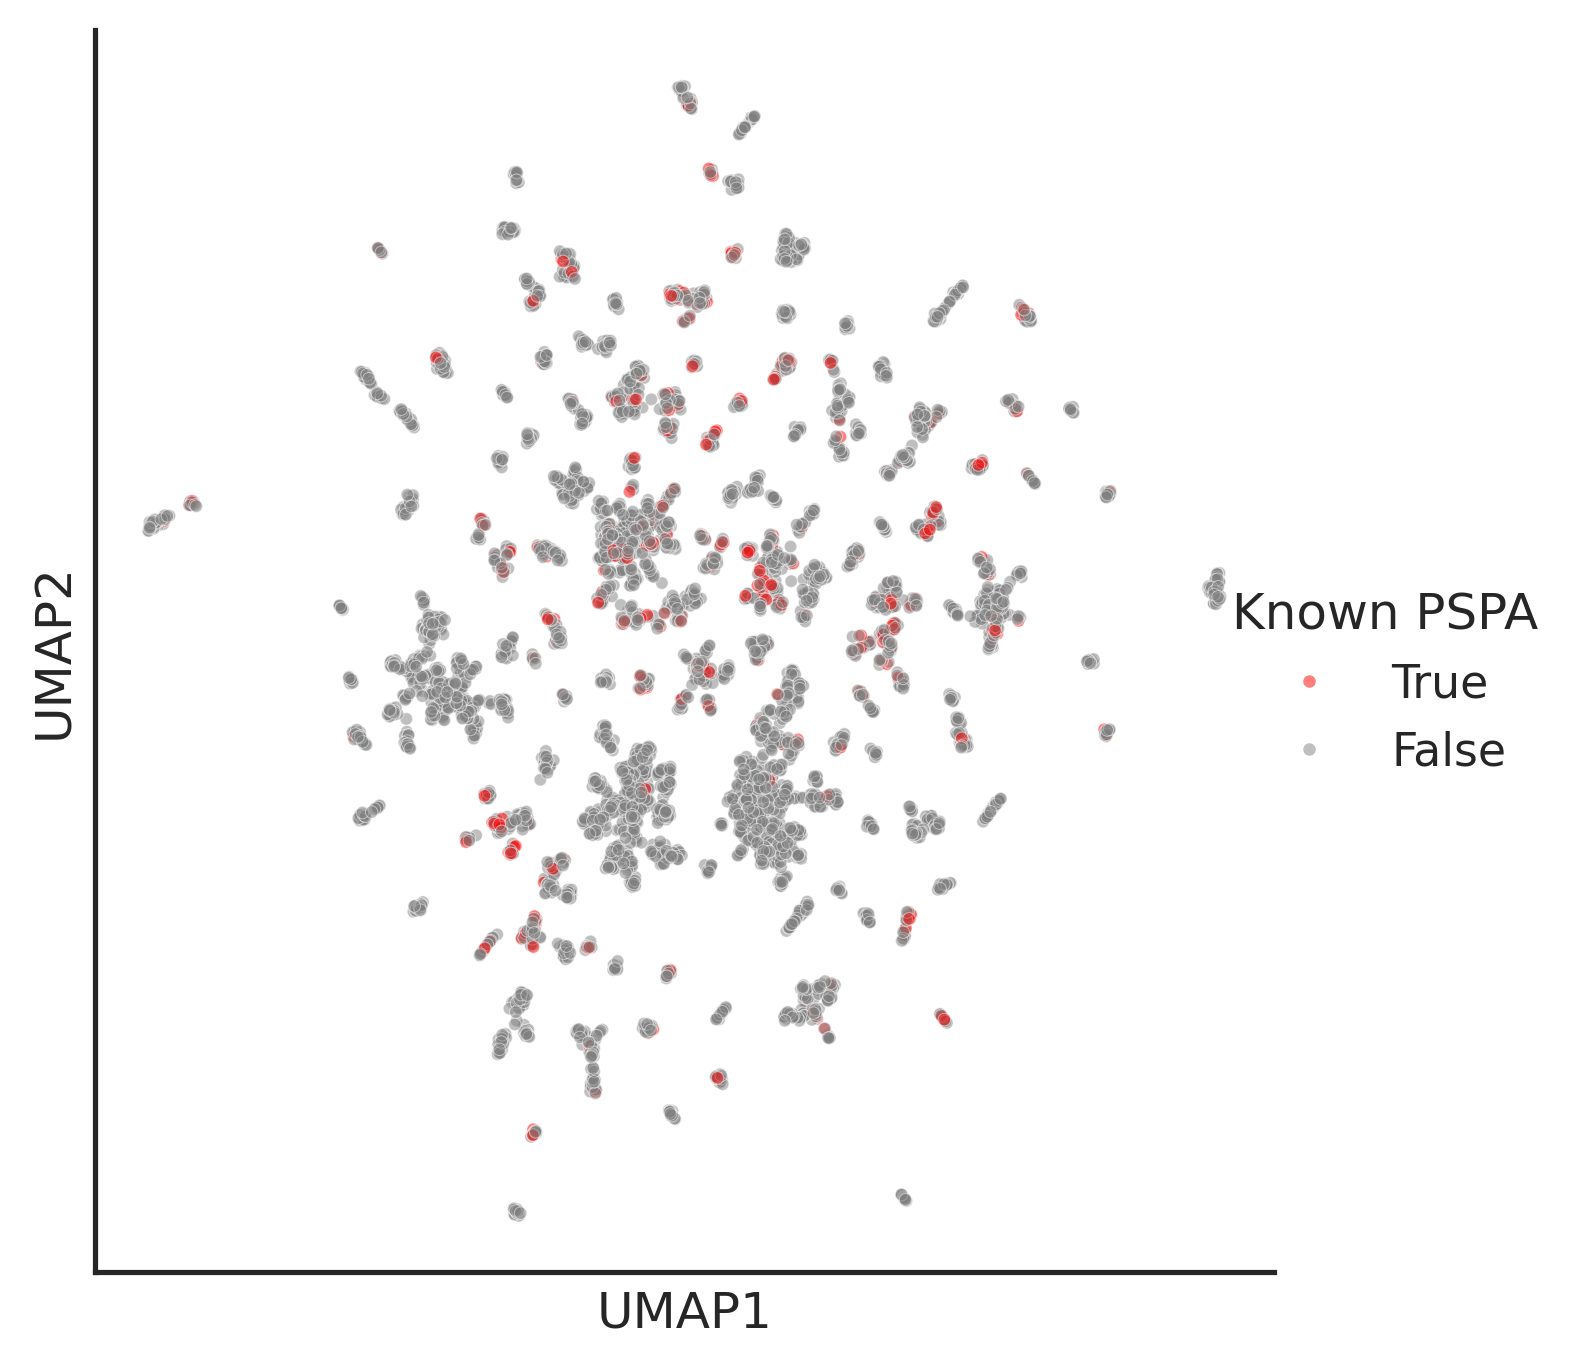

In [ ]:
plot_umap(umap2d_all,
          box_title='Known PSPA',alpha=0.5,
          hue = hue_is_PSPA,hue_order=[True, False],
          s=9,
          palette=TF_palette)

## PSPA kd plot

In [ ]:
encoded_df = get_onehot(onehot_pspa)

In [ ]:
encoded_df

,65_-,65_A,65_C,65_E,65_F,65_I,65_K,65_L,65_N,65_Q,...,3192_K,3192_L,3192_M,3192_Q,3192_R,3192_S,3192_T,3192_V,3192_W,3192_Y
kd_ID,,,,,,,,,,,,,,,,,,,,,
Q2M2I8_AAK1_HUMAN_KD1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
P27037_AVR2A_HUMAN_KD1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Q13705_AVR2B_HUMAN_KD1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
P31749_AKT1_HUMAN_KD1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
P31751_AKT2_HUMAN_KD1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P17948_VGFR1_HUMAN_KD1,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
P35968_VGFR2_HUMAN_KD1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
P35916_VGFR3_HUMAN_KD1,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
umap2d = reduce_feature(encoded_df,
                        'umap',
                        complexity=15,
                       min_dist=0.7
                       )

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [ ]:
hue_pspa = pspa_active_kd_remove2kd.set_index('kd_ID')['pspa_category']
hue_group = pspa_active_kd_remove2kd.set_index('kd_ID')['group']

In [ ]:
enrich_group = hue_pspa.value_counts()[hue_pspa.value_counts()>10].index

In [ ]:
hue_pspa_partial = hue_pspa[hue_pspa.isin(enrich_group)]

In [ ]:
group_color = pd.read_csv('raw/group_color.csv')

In [ ]:
group_color = group_color.set_index('Label')['Color'].to_dict()

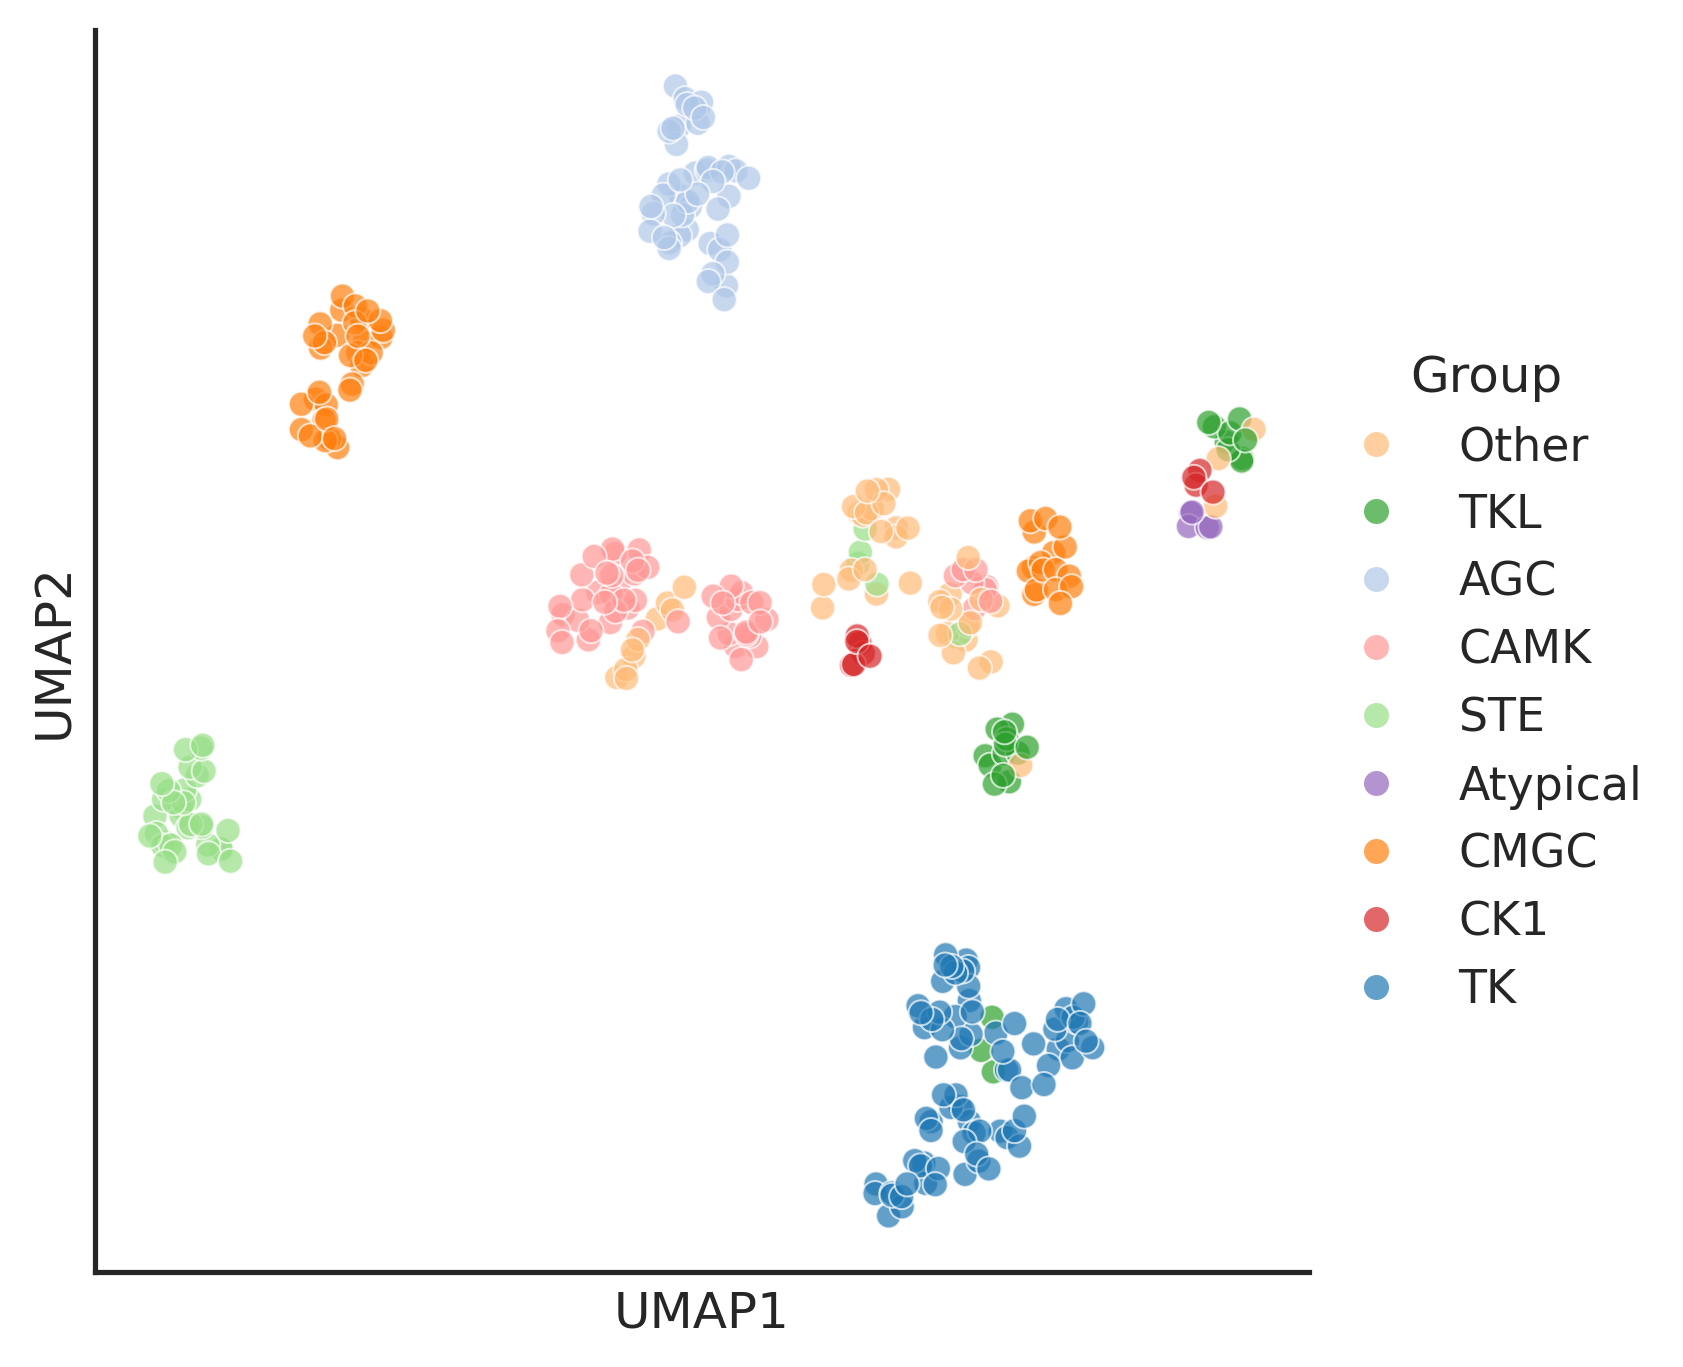

In [ ]:
plot_umap(umap2d,box_title='Group',hue=hue_group, palette=group_color)

In [ ]:
pspa_color = get_color_dict(hue_pspa_partial.unique())

In [ ]:
def rgb_to_hex(rgb_dict):
    """
    Convert a dictionary with RGB values in [0, 1] to hex color codes.
    """
    hex_dict = {
        key: '#{:02X}{:02X}{:02X}'.format(
            int(r * 255), int(g * 255), int(b * 255)
        )
        for key, (r, g, b) in rgb_dict.items()
    }
    return hex_dict

In [ ]:
pspa_color = rgb_to_hex(pspa_color)

In [ ]:
pspa_color = pd.DataFrame.from_dict(pspa_color,orient='index').reset_index()

In [ ]:
pspa_color.columns=['Label','Color']

In [ ]:
# pspa_color.to_csv('raw/pspa_color.csv',index=False)

In [ ]:
pspa_color=pd.read_csv('raw/pspa_color.csv')

In [ ]:
pspa_color = pspa_color.set_index('Label')['Color'].to_dict()

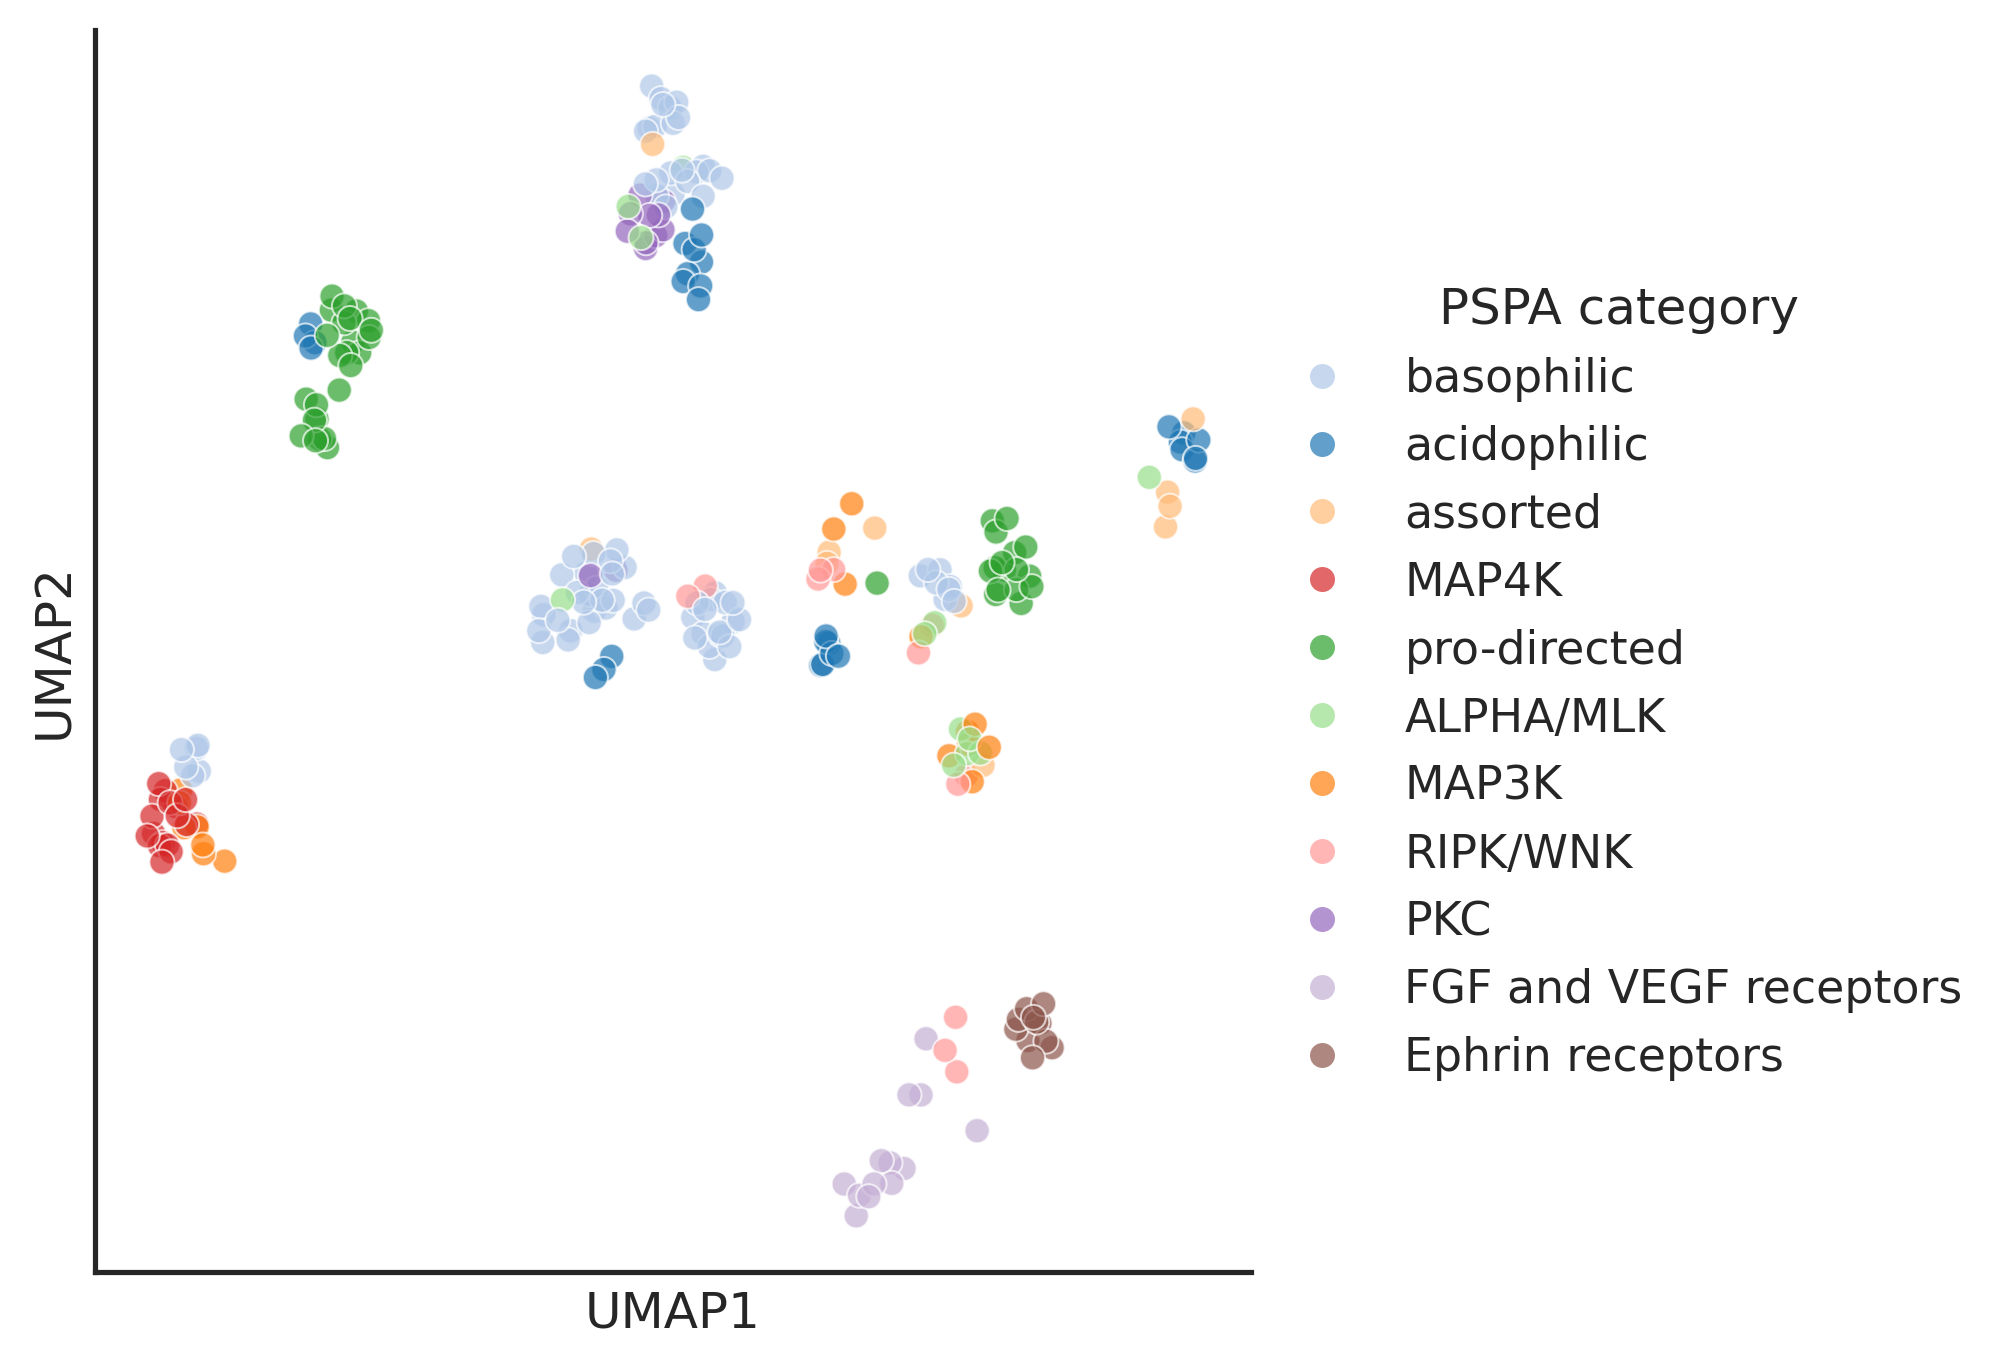

In [ ]:
plot_umap(umap2d,box_title='PSPA category',hue=hue_pspa_partial,palette=pspa_color)